In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['order-20161115', 'gps-20161115', 'gps-20161115-with-zonelables']


In [2]:
gps = pd.read_csv('../input/gps-20161115/gps_20161115',names=['vehicle_id', 'order_id', 'universal_time', 'longitude', 'latitude'],)


In [4]:
gps.head(5)

,vehicle_id,order_id,universal_time,longitude,latitude
0,cbd8237f1b71595dbfc963c439e8ee00,ba70af5bd30a9026e756c82314291192,1479194294,104.07323,30.69225
1,cbd8237f1b71595dbfc963c439e8ee00,ba70af5bd30a9026e756c82314291192,1479194296,104.07323,30.69225
2,cbd8237f1b71595dbfc963c439e8ee00,ba70af5bd30a9026e756c82314291192,1479194300,104.07323,30.69225
3,cbd8237f1b71595dbfc963c439e8ee00,ba70af5bd30a9026e756c82314291192,1479194303,104.07323,30.69225
4,cbd8237f1b71595dbfc963c439e8ee00,ba70af5bd30a9026e756c82314291192,1479194306,104.07323,30.69225


In [5]:
#to extract hours
from datetime import datetime
def second_to_timestamp(df):
    return datetime.fromtimestamp(df).strftime('%H')
gps['hour'] = (gps.universal_time.apply(second_to_timestamp))

In [7]:
gps.head(10)
gps['hour']=gps['hour'].astype('int')

In [24]:
gps.describe()

,universal_time,longitude,latitude,hour
count,2.890600e+07,2.890600e+07,2.890600e+07,2.890600e+07
mean,1.479191e+09,1.040781e+02,3.067961e+01,7.799566e+00
std,1.846169e+04,2.131658e-02,1.921402e-02,5.631042e+00
min,1.479139e+09,1.040421e+02,3.065294e+01,0.000000e+00
25%,1.479177e+09,1.040604e+02,3.066324e+01,3.000000e+00
50%,1.479191e+09,1.040759e+02,3.067545e+01,7.000000e+00
75%,1.479204e+09,1.040946e+02,3.069374e+01,1.100000e+01
max,1.479226e+09,1.041296e+02,3.072775e+01,2.300000e+01


In [25]:
#check missing data
gps.isnull().sum()
#duplicated data
gps.duplicated().sum()

0

0     1867383
1     1954371
2     1910586
3     1749850
4     1732354
5     2052265
6     2298125
7     2039022
8     1819889
9     1711334
10    1308145
11    1278219
12    1358190
13    1337010
14    1257682
15     850303
16     390585
17     293057
18     200711
19     115418
20     121906
21     114228
22     185407
23     959962
Name: hour, dtype: int64


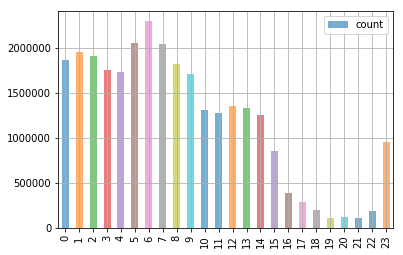

In [21]:
# to show hourly gps count for one day
import matplotlib.pyplot as plt
s = gps.hour.value_counts().sort_index()
print(s)
s.plot(kind='bar',grid=True,legend=True,label='count', alpha=0.6)


In [22]:
#plot heatmap
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[gps['latitude'].mean(), gps['longitude'].mean()])
gps_mtx = gps[["latitude","longitude"]].head(50000).values
m.add_child(HeatMap(data = gps_mtx,radius =5))

In [ ]:
#plot gps count for one car  <5

In [23]:
m = folium.Map(location=[gps['latitude'].mean(), gps['longitude'].mean()])

veh_sum = gps.vehicle_id.value_counts()
veh_sum = veh_sum[veh_sum<5].index

veh_array = gps[gps.vehicle_id.isin(veh_sum)][["latitude","longitude"]].values

m.add_child(HeatMap(data=veh_array))



In [ ]:
!pip install gmplot

In [ ]:
gpslable = pd.read_csv('../input/gps-20161115-with-zonelables/gps_20161115_with_zonelabels')
gpslable.head(5)
gpslable.describe()
import folium
from folium.plugins import HeatMap
hmap = folium.Map(location=[gpslable['latitude'].mean(), gpslable['longitude'].mean()])
data = gpslable[['latitude', 'longitude']].head(10000).values.tolist()
hmap.add_child(HeatMap(data = data, radius=5))
